In [9]:
from IPython.display import Image 

# Identifying features from text

## Types of textual features - 1

### Words
    
    - By far the most common class of features
    - Handling commonly-occuring words: Stop words
    - Normalization: Make lower case vs leave as-is
    - Stemming / Lemmatization
   
## Types of textual features - 2

    - Capitalisation
    - Parts of speech of words in sentece
    - Grammatical structure, sentence parsin
    - Groping words of similar meaning, semantics
        - buy, purchase
        - Number/Digits
        
## Types of textual features - 3

    - Depeending on classification tasks, features may come from inside words and word sequences
      - bigrams, trigrams, n-grams: "White House"
      - chracter sub-sequences in words: -ing, -ion

## Naive Bayes

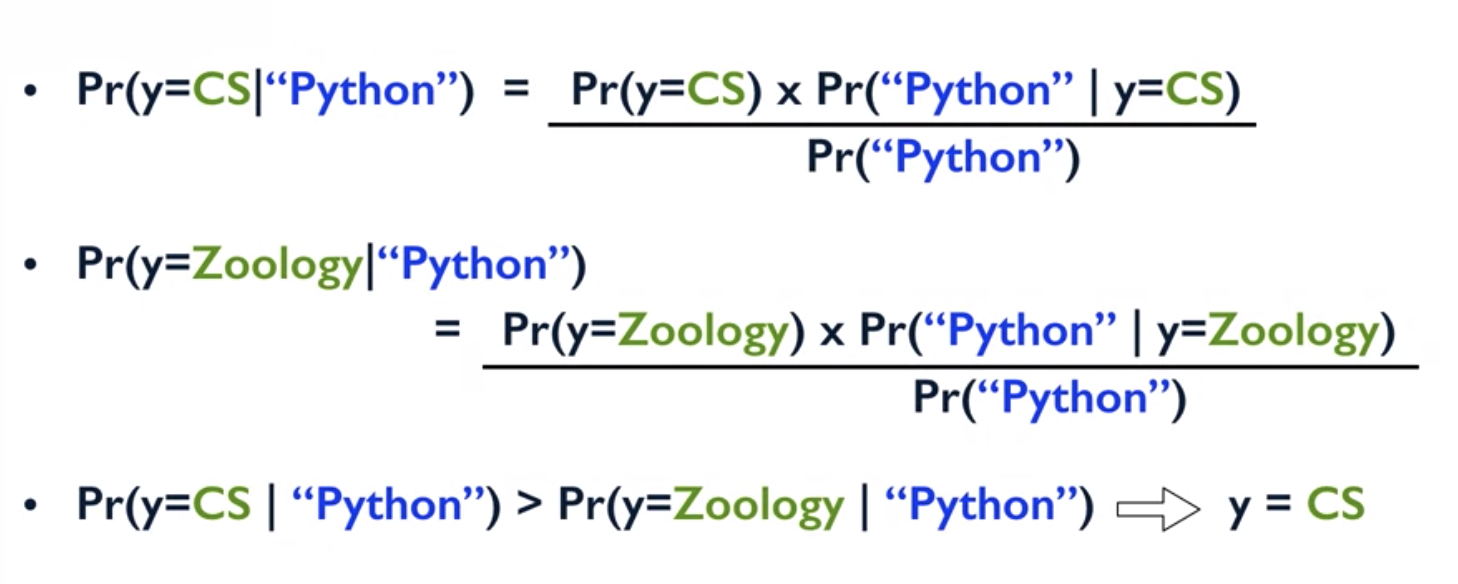

In [7]:
Image("Bayes.png")

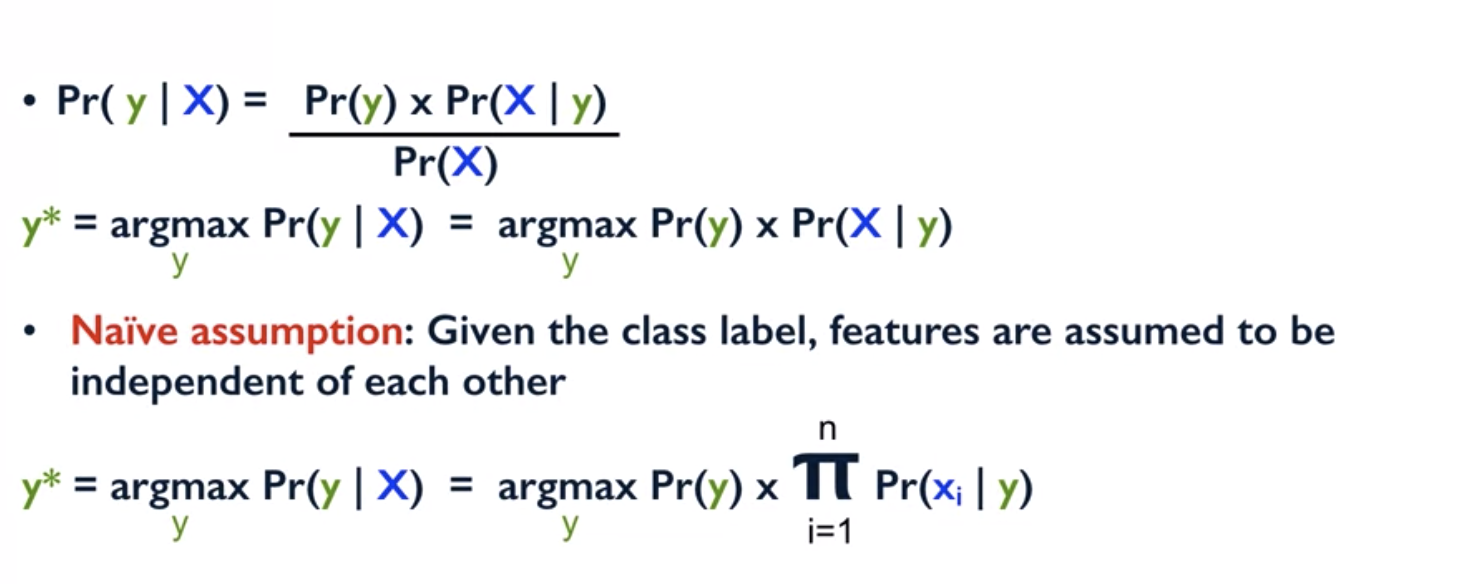

In [8]:
Image("Bayes2.png")

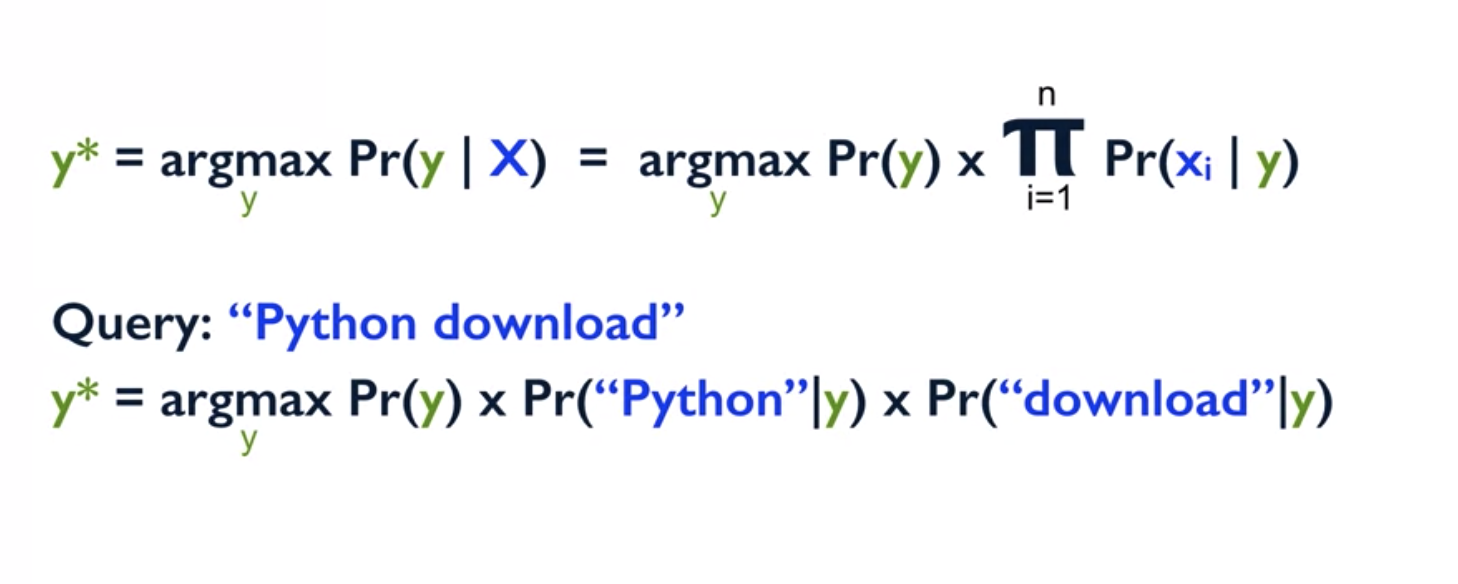

In [10]:
Image("Bayes3.png")

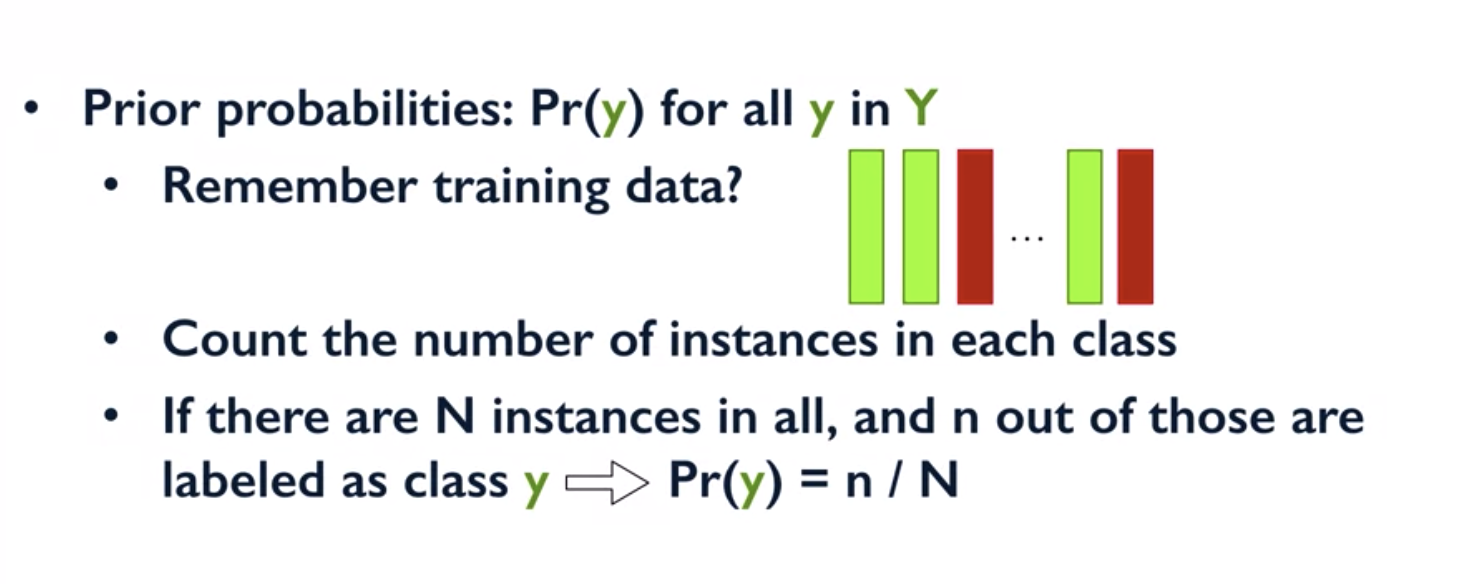

In [11]:
Image("Bayes4.png")

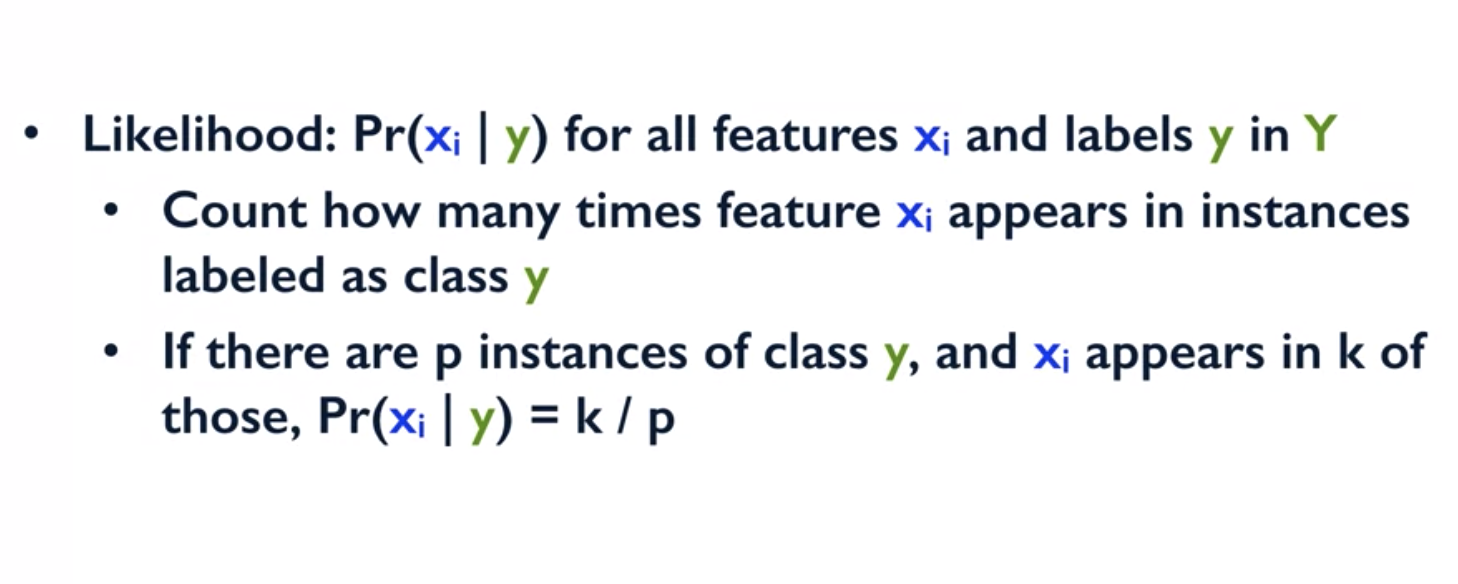

In [12]:
Image("Bayes5.png")

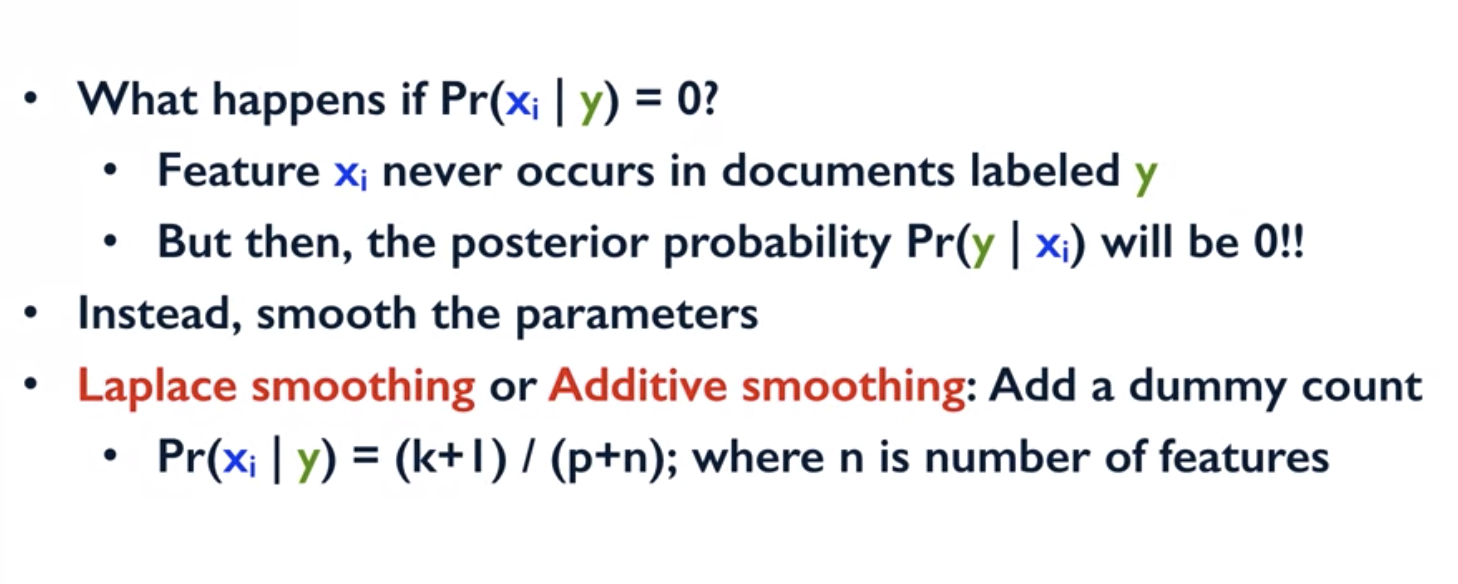

In [13]:
Image("Bayes6.png")

## Case Study: Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [2]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,1
11,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,This is a great product it came after two days...,0.0,1


In [3]:
# Most ratings are positive
df['Positively Rated'].mean()

0.7482686025879323

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=42)

In [8]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Fits snug and has protected my phone for over a month now through drops that would've otherwise shattered my phone. Highly recommended!


X_train shape:  (231207,)


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [52]:
vect.get_feature_names()

['00',
 '4hd',
 'adr6275',
 'assertions',
 'blemishe',
 'catches',
 'conectarte',
 'debvolucion',
 'dolly',
 'estaré',
 'flashlightcons',
 'goooooddddd',
 'huaweis',
 'irritants',
 'lightweigh',
 'microsimcard',
 'niice',
 'p229',
 'ponerse',
 'quialty',
 'resolutionoverall',
 'selback',
 'somenone',
 'sweating',
 'tornado',
 'usd170',
 'wildfire']

In [12]:
len(vect.get_feature_names())

53438

In [13]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<231207x53438 sparse matrix of type '<class 'numpy.int64'>'
	with 6123196 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train_vectorized, y_train)

LogisticRegression(solver='newton-cg')

In [17]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.92690647170675


In [18]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['mony' 'worst' 'worthless' 'false' 'horribly' 'blacklist' 'messing'
 'junk' 'nope' 'unsatisfied']

Largest Coefs: 
['excelent' 'excelente' '4eeeks' 'loving' 'excellent' 'efficient'
 'ofamanda' 'loves' 'lovely' 'exelente']


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer().fit(X_train)
len(vect.get_feature_names())

53438

In [30]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression(solver='newton-cg')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9273477013212171


In [31]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['reviewwith' 'pronunciation' 'romanized' 'getpeeka' 'debut' 'hootsuite'
 'authenticates' 'tweetie' 'prontos' 'peeks']

Largest tfidf: 
['fantástic' 'didnot' 'you' 'it' 'different' 'works' 'worksfine' 'ititthi'
 'recibido' 'di']


In [32]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'terrible' 'waste' 'return' 'useless' 'disappointed' 'poor'
 'horrible' 'returning']

Largest Coefs: 
['love' 'great' 'excellent' 'perfect' 'amazing' 'easy' 'awesome' 'best'
 'loves' 'perfectly']


In [33]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


In [39]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5,ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

199917

In [40]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9665745122061123


In [41]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'worst' 'horrible' 'not good' 'garbage' 'not happy'
 'terrible' 'looks ok' 'nope']

Largest Coefs: 
['excelent' 'not bad' 'excelente' 'excellent' 'perfect' 'no problems'
 'no issues' 'awesome' 'great' 'amazing']


In [42]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [43]:
#assignment

In [53]:
def answer_one():
    
    spam_data[spam_data['target'] == 1]['target'].count()
    
    return (spam_data[spam_data['target'] == 1]['target'].count() / spam_data.shape[0]) * 100

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def answer_two():
    import pandas as pd
    
    vect = CountVectorizer().fit(X_train)
    a = vect.get_feature_names()
    df = pd.DataFrame(a)
    length = [len(x) for x in a]
    df['length'] = length
    
    return df[df['length'] == (df['length'].max())].iloc[0,0]